In [1]:
# Import necessary libraries for the lab tasks
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task A – Matplotlib Warm-Up

I load the Sample Superstore sheet, fix the order dates, and draw a sales bar plus a quarterly line chart with Matplotlib. Handling each label myself keeps me close to the numbers and helps me explain the trend the way I would in Pakistan.


In [15]:
# Load the Superstore dataset using Pandas
file_path = '../Sample-Superstore.csv'
df = pd.read_csv(file_path, encoding='latin1')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


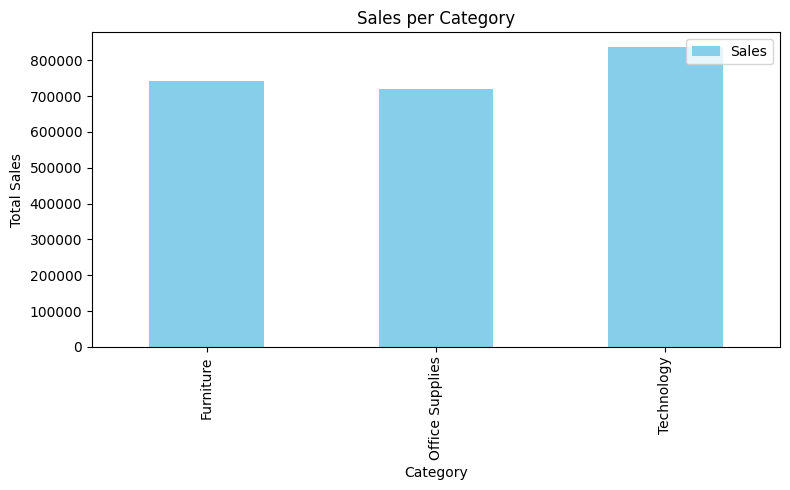

In [16]:
# Bar Chart: Sales per category using Matplotlib
category_sales = df.groupby('Category')["Sales"].sum()
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Sales per Category')
plt.legend(["Sales"], loc='upper right')
plt.tight_layout()
plt.show()

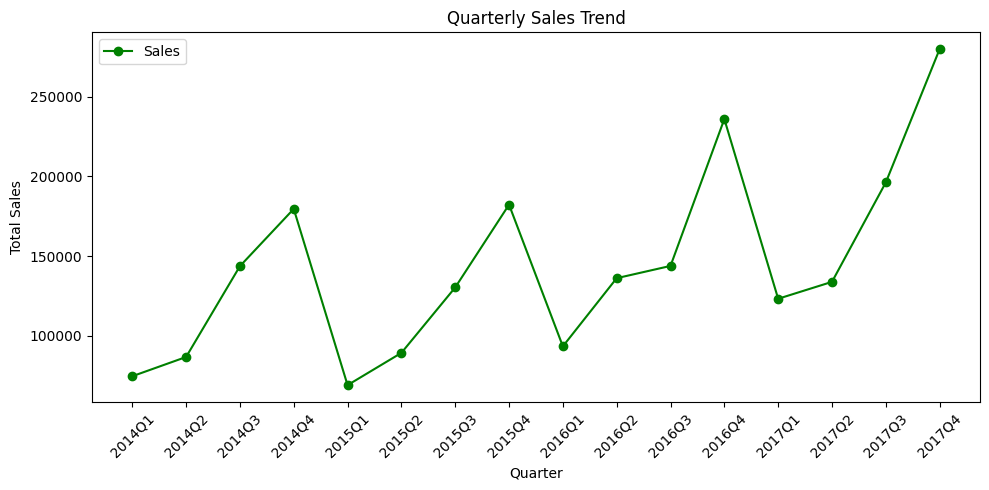

In [17]:
# Line Plot: Quarterly sales trend using Matplotlib
quarterly_sales = df.groupby(df["Order Date"].dt.to_period("Q"))["Sales"].sum()
plt.figure(figsize=(10,5))
quarterly_sales.index = quarterly_sales.index.astype(str)
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-', color='green')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales Trend')
plt.legend(["Sales"], loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Task B – Faster Styling with Seaborn

After the Matplotlib run, I answer the same questions with Seaborn. Because it works smoothly with DataFrames, I can focus on the meaning of the chart instead of fighting with colors.


/tmp/ipykernel_2724494/2643231865.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Category', y='Sales', palette='Blues', ax=ax, label='Sales')


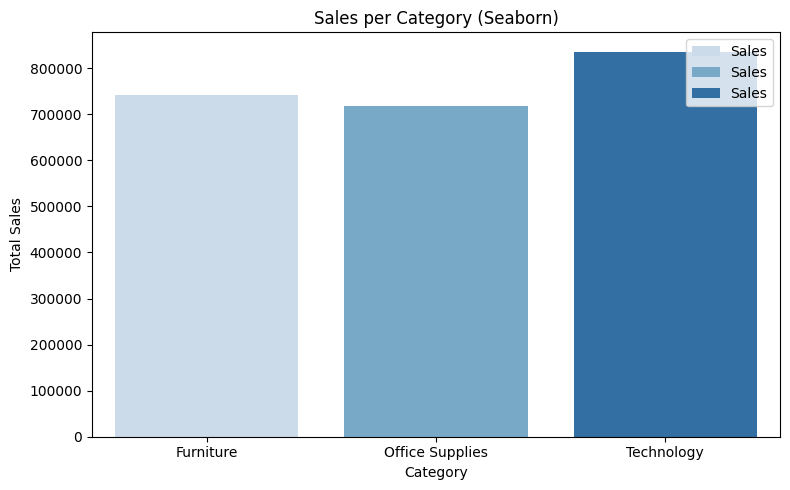

In [21]:
# Seaborn (Axes-level): Bar Chart - Sales per category
category_sales = df.groupby('Category', as_index=False)['Sales'].sum()
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=category_sales, x='Category', y='Sales', palette='Blues', ax=ax, label='Sales')
ax.set(xlabel='Category', ylabel='Total Sales', title='Sales per Category (Seaborn)')
ax.legend(loc='upper right')
fig.tight_layout()

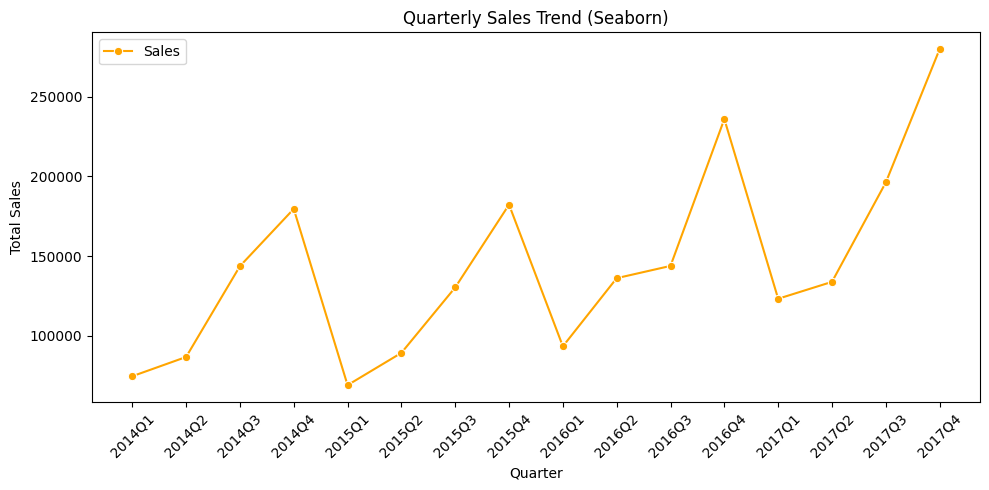

In [22]:
# Seaborn (Axes-level): Line Plot - Quarterly sales trend
quarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()
qs = quarterly_sales.reset_index()
qs['Order Date'] = qs['Order Date'].astype(str)
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=qs, x='Order Date', y='Sales', marker='o', color='orange', ax=ax, label='Sales')
ax.set(xlabel='Quarter', ylabel='Total Sales', title='Quarterly Sales Trend (Seaborn)')
ax.legend(loc='upper left')
plt.setp(ax.get_xticklabels(), rotation=45)
fig.tight_layout()

## Task C – Quick Pie Checks

I break the orders by customer segment and region through small pie charts. They are my quick mix check before I invest time in deeper comparisons.


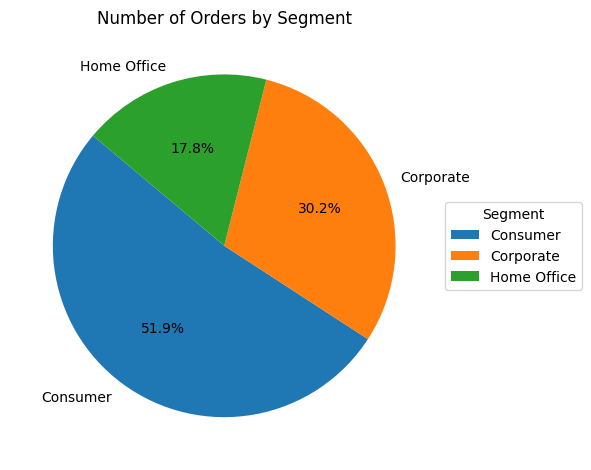

In [23]:
# Pie Chart: Number of orders by segment
segment_counts = df['Segment'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Number of Orders by Segment')
ax.legend(wedges, segment_counts.index, title='Segment', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

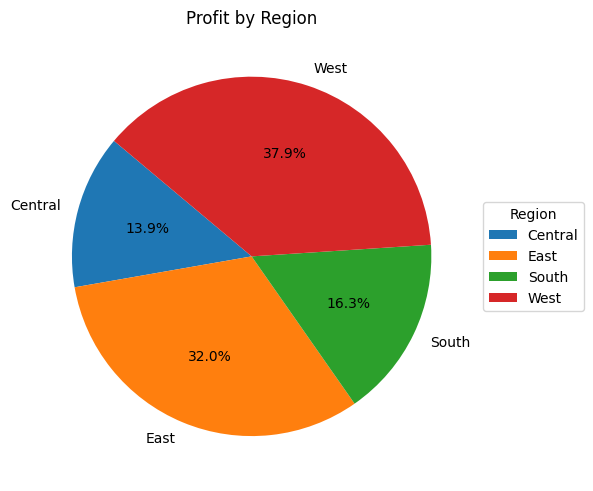

In [24]:
# Pie Chart: Profit by region
region_profit = df.groupby('Region')['Profit'].sum()
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(region_profit, labels=region_profit.index, autopct='%1.1f%%', startangle=140)
ax.set_title('Profit by Region')
ax.legend(wedges, region_profit.index, title='Region', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Task D – Picking Between Matplotlib and Seaborn

I write down how I choose between these two friends. Seaborn gives me clean pictures fast, while Matplotlib lets me place every tick and annotation when a report needs special formatting.

| Library | Why I like it | What slows me down | Usual use |
| --- | --- | --- | --- |
| Matplotlib | Full control on every element; perfect for matching report templates. | Needs more code and styling effort for simple plots. | Publication-style charts and complex multi-axis layouts. |
| Seaborn | Friendly with DataFrames and has ready themes. | I still drop into Matplotlib for rare layouts. | Fast EDA, categorical views, and teaching demos. |

Whatever I choose, I keep my assumptions in the markdown so the visuals stay honest.
